# Step 0 — Project Setup & Introduction

This notebook begins the **Exploratory Data Analysis (EDA)** phase for the Titanic dataset.  
The goals of this step are:
- Confirm the dataset is loaded correctly from the `../data/raw/` folder
- Review the structure, size, and data types
- Identify which columns may need cleaning or transformation later

Note: At this stage, I am only inspecting and learning about the dataset.  
Cleaning, feature engineering, and modeling will be done in later notebooks.

#### Step 0 - Load Python Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 1 - Load Raw Data
We load the dataset to begin exploration and analysis. 

In [6]:
titanic = pd.read_csv('../data/raw/train.csv')

#### Step 2 -Ispect Missing Values & Data Types
We check data types and missing values to plan cleaning

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Step 3 - Preview Data (head, tail, sample)
We preview rows to get a quick sense of structure.

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
titanic.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5,NaN,S


#### Step 4 — Summary Statistics (numerical + categorical) 
We view summary stats to understand distributions and anomalies. 

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Step 5 - Unique Values & Cardinality (categorical features) 
We check unique values to spot high-cardinality features. 

In [14]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Step 6 — Class Balance (target variable distribution)
We assess target distribution to detect imbalance issues.  

In [21]:
titanic['Survived'].value_counts(normalize=False)

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

#### Step 7 — Correlation Analysis (numeric features vs target) 
We measure correlations to find relationships with the target.

In [25]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
num_cols = titanic.select_dtypes(include=['number'])
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [27]:
num_cols.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Rule of Thumb for Correlation Strength
- **0.0 – 0.1** → Negligible  
- **0.1 – 0.3** → Weak  
- **0.3 – 0.5** → Moderate  
- **0.5 – 1.0** → Strong  

#### Step 8 — Outlier Detection (boxplots) 
We detect extreme values that could distort modeling.

In [49]:
num_cols_list = titanic.select_dtypes(include=['number']).drop(['Survived'], axis=1).columns.to_list()
num_cols_list

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

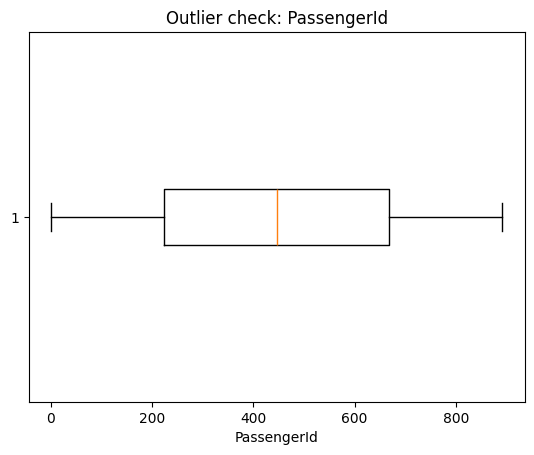

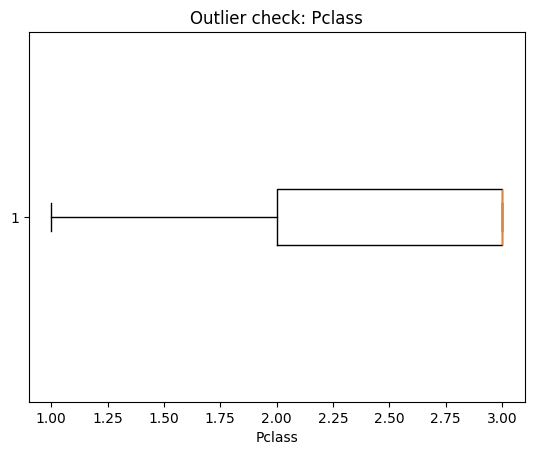

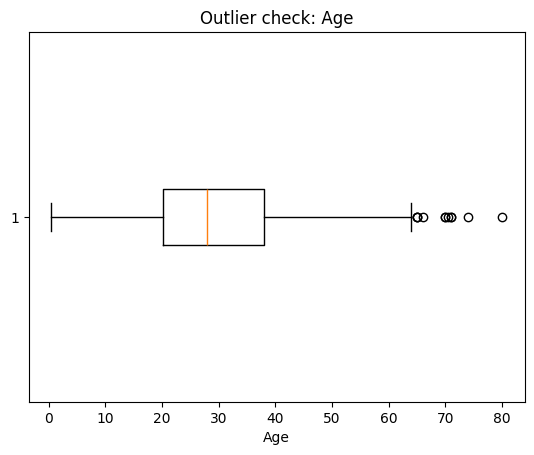

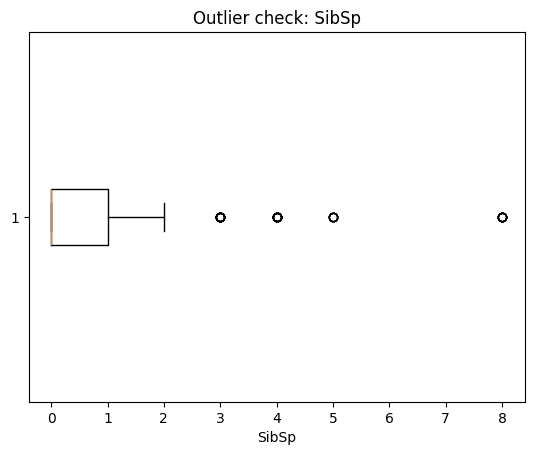

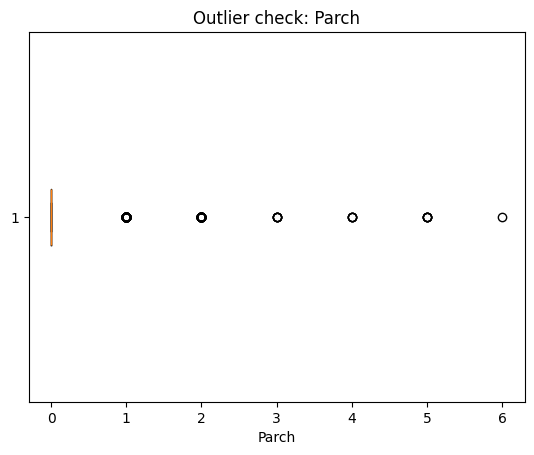

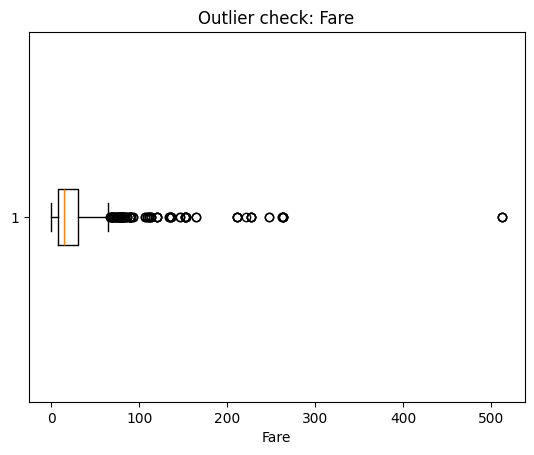

In [51]:
for col in num_cols_list:
    fig, ax = plt.subplots()
    ax.boxplot(titanic[col].dropna(), vert=False)
    ax.set_title(f'Outlier check: {col}')
    ax.set_xlabel(col)
    plt.show()

##### Outlier Detection (Findings)

- **Age** → Most between 20–40, median ~28.  
  Outliers: elderly passengers (65–80).  
  Keep (valid ages).  

- **SibSp** → Most passengers had 0–2 siblings/spouses.  
  Outliers: few large families (3–8).  
  Keep (real cases, may combine with Parch).  

- **Parch** → Most had 0–1 parents/children.  
  Outliers: some with 3–6.  
  Keep (real cases, may combine with SibSp).  

- **Fare** → Most fares under 50.  
  Outliers: very high fares (200–500).  
  Keep, but consider log-transform later to reduce skew.  

- **Pclass** → Values only 1, 2, 3.  
  No outliers.  

- **PassengerId** → Sequential ID (1–891).  
  Not a feature, will be dropped in cleaning.  

**Conclusion:** Outliers exist but are valid. We will keep them.  
For Fare, a transformation (e.g., log scale) may help later.


#### Step 9 — Distribution Plots (histograms, KDE, countplots) 
We visualize feature distributions to compare shapes and trends. 

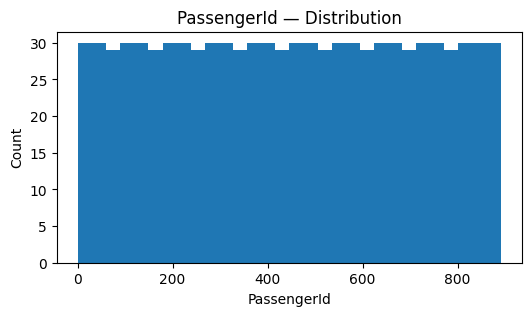

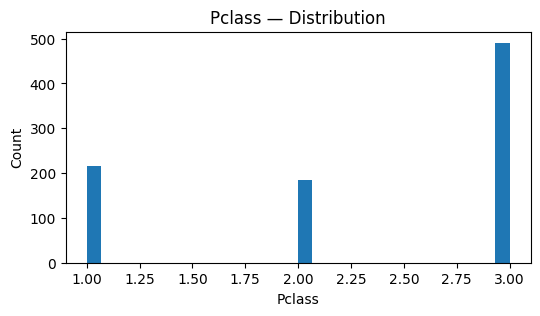

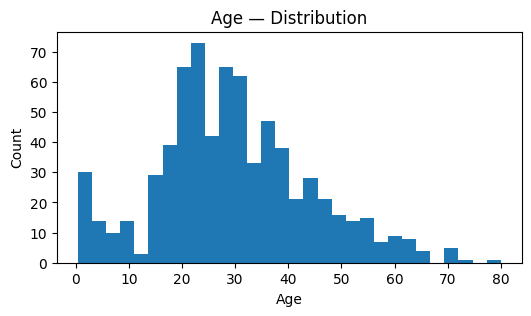

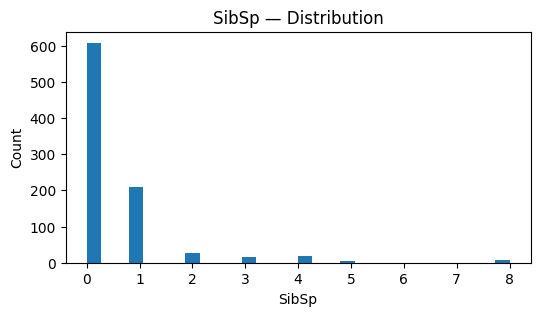

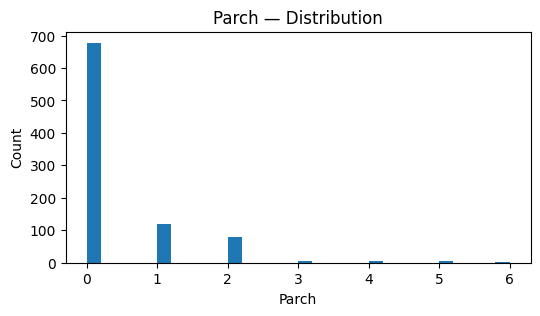

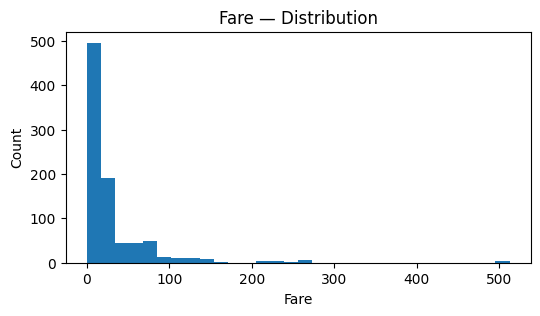

In [53]:
for col in num_cols_list:
    fig, ax = plt.subplots(figsize=(6,3))
    ax.hist(titanic[col].dropna(), bins=30)
    ax.set_title(f"{col} — Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.show()

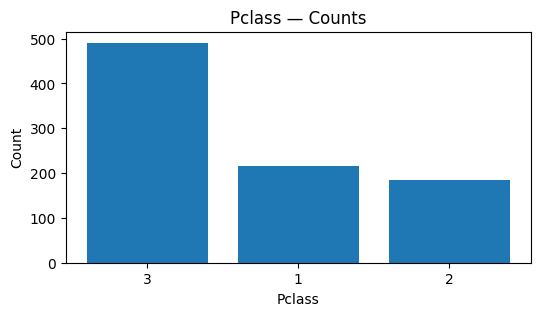

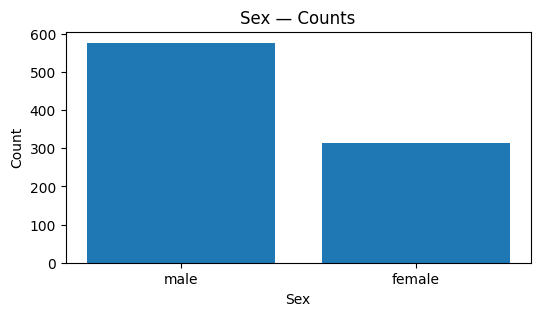

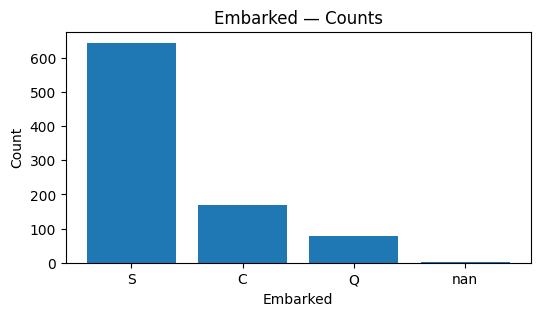

In [54]:
cat_cols = ["Pclass", "Sex", "Embarked"]

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    vc = titanic[col].value_counts(dropna=False)
    ax.bar(vc.index.astype(str), vc.values)
    ax.set_title(f"{col} — Counts")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.show()

#### Distribution Plots (Findings)

- **Age**  
  - Distribution is roughly bell-shaped, centered around ~28 years.  
  - Most passengers were between 20–40.  
  - Few elderly passengers (65–80) exist but are rare.  

- **Fare**  
  - Highly skewed to the right.  
  - Majority paid under 50, but a few paid extremely high fares (200–500).  
  - Action: May apply log-transform later to reduce skew.  

- **SibSp**  
  - Most passengers had 0–1 siblings/spouses aboard.  
  - Very few had large families (up to 8).  
  - Action: Weak on its own, but useful combined with Parch.  

- **Parch**  
  - Most passengers had 0 parents/children aboard.  
  - Some had 1–3, very few had 4–6.  
  - Action: Useful when combined with SibSp to create FamilySize.  

- **Pclass**  
  - Clear imbalance: 3rd class had the largest group.  
  - 1st and 2nd class were smaller groups.  

- **Sex**  
  - More males (~65%) than females (~35%).  
  - This imbalance may affect survival rates.  

- **Embarked**  
  - Most passengers boarded from Southampton (S).  
  - Fewer from Cherbourg (C) and Queenstown (Q).  
  - A couple of missing values also appear here.


#### Step 10 — Cross-tabulations / Grouped Analysis
We group features to reveal patterns across categories.

In [56]:
## Step 10 — Cross-tabulations / Grouped Analysis

cat_cols = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for col in cat_cols:
    print(f"\nSurvival by {col}")
    print(pd.crosstab(titanic[col], titanic["Survived"], margins=True))
    print("-"*50)



Survival by Sex
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891
--------------------------------------------------

Survival by Pclass
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891
--------------------------------------------------

Survival by Embarked
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889
--------------------------------------------------

Survival by SibSp
Survived    0    1  All
SibSp                  
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
All       549  342  891
--------------------------------------------------

Survival by Parch
Survived    0    1  All
Parch                  
0  

#### Cross-tabulations (Findings)

- **Sex**  
  - Female survival: 233 / 314 → ~74%  
  - Male survival: 109 / 577 → ~19%  
  Sex is the strongest categorical predictor. Women had much higher survival.

- **Pclass**  
  - 1st class survival: ~63%  
  - 2nd class survival: ~47%  
  - 3rd class survival: ~24%  
  Clear trend: higher class = better survival.

- **Embarked**  
  - C (Cherbourg): ~55% survived  
  - Q (Queenstown): ~39% survived  
  - S (Southampton): ~34% survived  
  Embarked shows some effect. Passengers from Cherbourg had higher survival.

- **SibSp**  
  - Most with 0–1 family → moderate survival  
  - Large families (3–8) → very low survival  
  Better to combine with Parch into a FamilySize feature.

- **Parch**  
  - 0 → ~34% survived  
  - 1–3 → ~50% survived  
  - >3 → very low survival  
  Works best when combined with SibSp.

---

#### Conclusion / Actions
1. Keep **Sex** and **Pclass** as key features.  
2. Encode **Embarked** (one-hot encoding).  
3. Combine **SibSp + Parch** into **FamilySize** (and possibly IsAlone).  
4. Confirmed patterns match history: women and children in higher classes had the highest survival rates.
